 We’ll dive into three introductory examples of
how to use neural networks to address real problems:


*   Classifying movie reviews as positive or negative (binary classification)



*   Classifying news wires by topic (multiclass classification)




*   Estimating the price of a house, given real-estate data (regression)



#Anatomy of a neural network
Training a neural network revolves around the following objects:

*   Layers, which are combined into a network (or model)
*   The input data and corresponding targets
*   The loss function, which defines the feedback signal used for learning
*  The loss function, which defines the feedback signal used for learning
![alt text](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/03fig01.jpg)


1.   Layers: the building blocks of deep learning

A layer is a data-processing module that takes as input one or
more tensors and that outputs one or more tensors. Some layers are stateless, but
more frequently layers have a state: the layer’s weights, one or several tensors learned
with stochastic gradient descent, which together contain the network’s knowledge.
A layer is a data-processing module that takes as input one or
more tensors and that outputs one or more tensors. Some layers are stateless, but
more frequently layers have a state: the layer’s weights, one or several tensors learned
with stochastic gradient descent, which together contain the network’s knowledge.The notion of layer compatibility here refers specifically to the fact that every layer
will only accept input tensors of a certain shape and will return output tensors of a certain shape.
2.   Models: networks of layers

A deep-learning model is a acyclic graph of layers. The most common
instance is a linear stack of layers, mapping a single input to a single output.
Some common ones include the following:



*   Two-branch networks
*   Multihead networks
*   Inception blocks

The topology of a network defines a hypothesis space.we defined machine learning as “searching for useful representations of some
input data, within a predefined space of possibilities, using guidance from a feedback
signal.” By choosing a network topology, you constrain your space of possibilities
(hypothesis space) to a specific series of tensor operations, mapping input data to output data. What you’ll then be searching for is a good set of values for the weight tensors involved in these tensor operations.

Picking the right network **architecture** is more an art than a science; and although
there are some best practices and principles you can rely on, only practice can help
you become a proper neural-network architect. 

3. Loss functions and optimizers:
keys to configuring the learning process

Once the network architecture is defined, you still have to choose two more things:



*  ***Loss function (objective function)***:The quantity that will be minimized during
training. It represents a measure of success for the task at hand.
*   ***Optimizer***:Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

A neural network that has multiple outputs may have multiple loss functions (one per
output). But the gradient-descent process must be based on a single scalar loss value;
so, for multiloss networks, all losses are combined (via averaging) into a single scalar
quantity.

when it comes to common problems such as classification, regression,
and sequence prediction, there are simple guidelines you can follow to choose the
correct loss.For instance, you’ll use binary crossentropy for a two-class classification
problem, categorical crossentropy for a many-class classification problem, meansquared error for a regression problem, connectionist temporal classification (CTC)
for a sequence-learning problem, and so on.






#**1-Classifying movie reviews: a binary classification example**
Classify movie reviews as
positive or negative, based on the text content of the reviews.

 you should never test a machinelearning model on the same data that you used to train it! Just because a model performs well on its training data doesn’t mean it will perform well on data it has never
seen; and what you care about is your model’s performance on new data.

In [0]:
!pip install tensorflow==1.14.0 #Down grade tensorflow beacue now it is on 2 version
import tensorflow as tf

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.

You can’t feed lists of integers into a neural network. You have to turn your lists into
tensors.There are two ways:

*   One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup
you’ll ever encounter. A type of network that performs well on such a problem is
a simple stack of fully connected (Dense) layers with relu activations: Dense(16,
activation='relu')

Having 16 hidden units means the weight matrix W will have shape (input_dimension,
16): the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation). Having more hidden units (a higher-dimensional representation space)
allows your network to learn more-complex representations, but it makes the network
more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data)

Two intermediate layers with 16 hidden units each

A third layer that will output the scalar prediction regarding the sentiment of
the current review.

The intermediate layers will use relu as their activation function, and the final layer
will use a sigmoid activation so as to output a probability (a score between 0 and 1)



In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Activation Functions**
Without an activation function like relu , the Dense layer
would consist of two linear operations—a dot product and an addition:

output = dot(W, input) + b

In order to get access to a much richer hypothesis space that would benefit from
deep representations, you need a non-linearity, or activation function.

A loss function and an optimizer:you’re facing a
binary classification problem and the output of your network is a probability (you end
your network with a single-unit layer with a sigmoid activation), it’s best to use the binary_crossentropy loss.

Crossentropy is measuring the distance between the ground-truth distribution and your predictions.

In [17]:
from keras import losses
from keras import metrics
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

25000

**Validating your approach**

In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.(x_train as 25000 sample.)

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

You’ll now train the model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
passing the validation data as the validation_data argument.

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

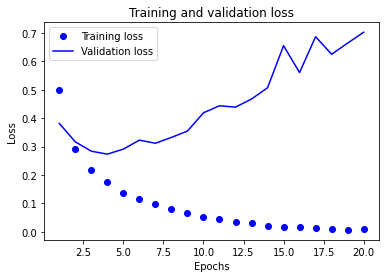

In [32]:
import matplotlib.pyplot as plt
from keras import losses
from keras import metrics
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

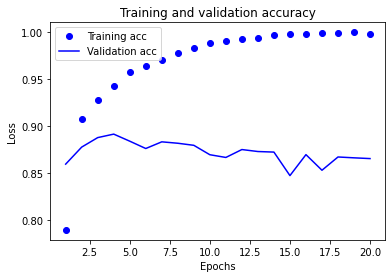

In [30]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradientdescent optimization.

**The quantity you’re trying to minimize should be less with
every iteration.**

But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch.This is an example of what we warned against earlier: a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you’re seeing is ***overfitting***:

after the second epoch, you’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:

In [0]:
model.predict(x_test)

In [0]:
#test the model without pridiction:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

**Summery 1:**


*   Stacks of Dense layers with relu activations can solve a wide range of problems
(including sentiment classification)

*   In a binary classification problem (two output classes), your network should
end with a Dense layer with one unit and a sigmoid activation: the output of
your network should be a scalar between 0 and 1, encoding a probability.
*   With such a scalar sigmoid output on a binary classification problem, the loss
function you should use is binary_crossentropy.


*  The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.

*   Be sure to always monitor performance on data that is outside of
the training set.


